In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### Análise dos dados

In [3]:
original_train = pd.read_csv('./resumo/train.tsv', '\t')
print(original_train.shape)
original_train.head()

(8529, 2)


,X,y
0,A series of escapades demonstrating the adage ...,1
1,"This quiet , introspective and entertaining in...",4
2,"Even fans of Ismail Merchant 's work , I suspe...",1
3,A positively thrilling combination of ethnogra...,3
4,Aggressive self-glorification and a manipulati...,1


### Preparação dos datasets de treino, validação e teste

In [4]:
from sklearn.model_selection import train_test_split

X = original_train['X']
y = original_train['y']

X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_other, y_other, test_size=0.2, stratify=y_other)

print('Train:', len(X_train), '\nValid:', len(X_valid), '\nTest: ', len(X_test), '\n\nTotal:', len(X))

Train: 5458 
Valid: 1365 
Test:  1706 

Total: 8529


In [5]:
train = pd.DataFrame({'y': y_train, 'X': X_train})
valid = pd.DataFrame({'y': y_valid, 'X': X_valid})
test = pd.DataFrame({'y': y_test, 'X': X_test})

train.to_csv('./resumo/train.csv', '\t', header=False, index=False)
valid.to_csv('./resumo/valid.csv', '\t', header=False, index=False)
test.to_csv('./resumo/test.csv', '\t', header=False, index=False)

In [6]:
train_stats = train['y'].value_counts(normalize=True) * 100
valid_stats = valid['y'].value_counts(normalize=True) * 100
test_stats = test['y'].value_counts(normalize=True) * 100
pd.DataFrame({'train' : train_stats, 'valid' : valid_stats, 'test' : test_stats })

,train,valid,test
3,27.207768,27.252747,27.198124
1,25.796995,25.787546,25.791325
2,19.402712,19.413919,19.402110
4,15.023818,15.018315,15.005862
0,12.568706,12.527473,12.602579


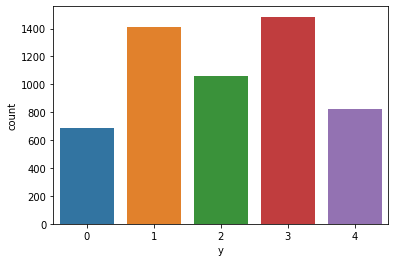

In [7]:
sns.countplot(data=train, x='y')
plt.show()

### Criação do vocabulário

In [8]:
import json
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit_transform(X)

vocab = {}
vocab['word2idx'] = {'<pad>': 0, '<start>': 1, '<end>': 2, '<unk>': 3}
vocab['idx2word'] = {'0': '<pad>', '1': '<start>', '2': '<end>', '3': '<unk>'}
vocab['idx'] = [0, 1, 2, 3]

for k, v in enumerate(vectorizer.vocabulary_.keys()):
    vocab['word2idx'][v] = k + 4
    vocab['idx2word'][str(k + 4)] = v
    vocab['idx'].append(k + 4)

with open('./resumo/vocab.json', 'w') as outfile:
    json.dump(vocab, outfile)

vocabSize = len(vocab['idx'])

print('Vocabulary size:', vocabSize)

Vocabulary size: 15170
